In [9]:
import warnings
warnings.filterwarnings('ignore')

## ISOM 230 Fall 2020
## Module 5 - Visualizations Using Seaborn

### Dr. Mohammad AlMarzouq

# What Is Seaborn?
- Plotting library built on top of matplotlib
- Adds more plotting options
- Simplifies plotting for some complex plots
- Improves the look of matplotlib plots
- Works almost exactly like matplot lib

# First Install Seaborn
## Seaborn is installed by default with Anaconda python
### Do the following if it is not installed:
Open Terminal or CMD and type the following command:
```bash
pip install seaborn

pip install statsmodels
```

# Using Seaborn

Just like pandas you have to import it:

In [3]:
# don't forget this
%matplotlib inline 
import seaborn as sns

# Now tell jupyter to use seaborn colors
sns.set(color_codes=True)

# Load Data Using URL
- The url is: https://raw.githubusercontent.com/vega/vega-datasets/gh-pages/data/weather.csv
- Load into weather_df variable
    - Remember the data must be tidy
    - Your job to tidy it up if it's not
- You can pass the url as a string into pd.read_csv and pandas will download the data:

In [1]:
import pandas as pd
weather_df = pd.read_csv("https://raw.githubusercontent.com/vega/vega-datasets/master/data/weather.csv")

In [9]:
# Your turn
# load https://github.com/vega/vega-datasets/raw/master/data/cars.json
# into cars_df


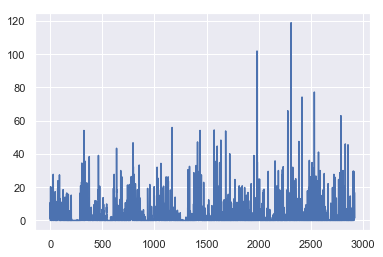

In [4]:
# Try to plot the distribution of the precipitation column
weather_df.precipitation.plot()

In [ ]:
# What was new about the previous plot?
# Can you do a histogram of precipitation


# Plots So Far
- Look better with seaborn
- Still univariate only
- Not much control

So let's try to improve

# General Seaborn/Matplot Workflow
1. Create an empty figure
2. Add single or multiple plots
    - Set the plot type and assign data to axis
3. Modify the aesthetics of the plot (e.g. axis, text, labels, ..etc.)
4. Show/Save the plot

Great for overlaying plots, making customization, and creating trellis/grid plots

# Simple Seaborn Workflow
- Just set the data to create a single plot

Excellent for quick EDA and allows for some customization

# CheatSheets
Use these to remind you about the basic workflow
- [Matplotlib](Python_Matplotlib_Cheat_Sheet.pdf)
- [Seaborn](seaborn_cheat_sheet.pdf)

**Source:** Datacamp.com

# Resources
- [How matplot lib works](https://matplotlib.org/tutorials/introductory/pyplot.html)
- [Matplot tutorials](https://matplotlib.org/tutorials/index.html) **Excellent resource on how to perform tasks**
- [Seaborn Tutorials](https://seaborn.pydata.org/tutorial.html)

# Univariate Plots (Distributional)
- BarPlot/CountPlot
- Histogram/Distribution plot
- PieChart
- Boxplot
- Violinplot
- Swarmplot
- Stripplot

# Univariate Plots (Distributional)
- Use these plots to examine the distribution of a single variable
- You can use them also later to compare distributions of two variable or two groups
- To determine which to use, refer again to this [cheatsheet as a starting point](https://i1.wp.com/www.tatvic.com/blog/wp-content/uploads/2016/12/Pic_2.png)

Let's examine how the weather_df and cars_df look like:

In [5]:
# How do we examine weather_df to know what columns exist?


In [7]:
# How do we examine cars_df to know what columns exist?


# Bar Plot/Count Plot
- Best for counting occorances and distribution of categorical data
- Count Plot is the name used in seaborn to distinguish it from the matplot bar plot, but they are the same
- Which columns are best examined using it?

- **weather_df**: Location, Weather
- **cars_df**: Cylinders, Origin, Year.
    - What about Name?

# How To Use Count Plot
- Check the reference for [Count Plot in Seaborn Documentation](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot)
- sns.countplot is the function
- Requires data argument, and name of variable to plot
    - Alternatively, you can just pass the variable
- Useful to get count of each category

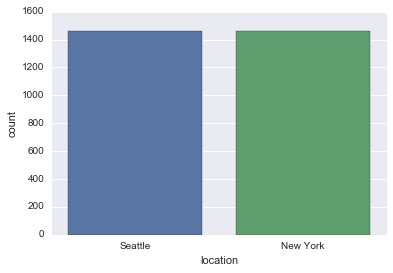

In [10]:
# BEWARE of case sensitivity, "Location" will not work!
sns.countplot("location", data=weather_df)

# Saving The Image Is Simple

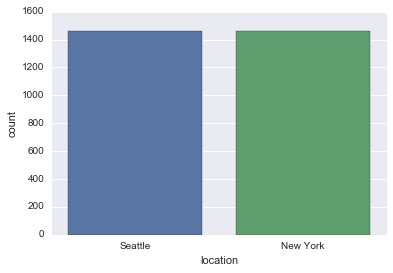

In [11]:
# Store the image in a variable:
cnt_plt = sns.countplot("location", data=weather_df)
# use saveFig and give the file a name
cnt_plt.figure.savefig("location_count1")
# For transparent background use
cnt_plt.figure.savefig("location_count2", transparent=True)

In [ ]:
# Your turn to examine the distribution of other categorical variables we identified
# from both weather_df and cars_df


# What About Cars_df.Name?
- Let's try to plot it using countplot and see what the problem is:

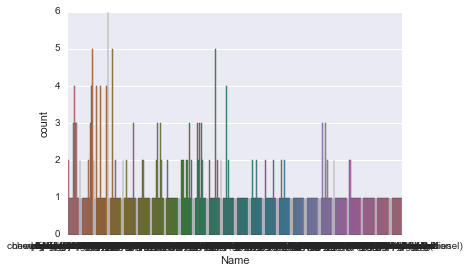

In [12]:
name_plt = sns.countplot('Name', data=cars_df)

# What Can We Do?
- Problem: Overwhelming plot which we cannot make sense of



- Cause: Many categories

- Solution: Reduce the categories, but how?
    - By getting a subset, we cannot work with all the data in this case
    - Must use meaningful criteria, for example:
        - Sort the data based on count, then filter by eamining the top/bottom 5 or 10

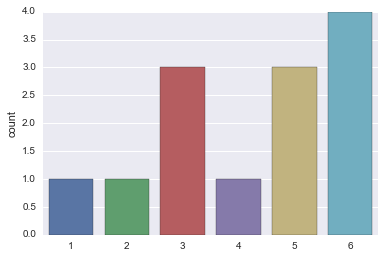

In [13]:
# But first, notice how countplot works
data = [1,2,3,3,3,4,5,5,5,6,6,6,6]
names_plt = sns.countplot(data)

# CountPlot will do the counting of the categories for you

In [14]:
# Look at cars_df.Name
cars_df.Name

# It is just a list of names (Pandas calls it series)
# CountPlot is able to count them but the image is not readable

0              chevrolet chevelle malibu
1                      buick skylark 320
2                     plymouth satellite
3                          amc rebel sst
4                            ford torino
5                       ford galaxie 500
6                       chevrolet impala
7                      plymouth fury iii
8                       pontiac catalina
9                     amc ambassador dpl
10                  citroen ds-21 pallas
11      chevrolet chevelle concours (sw)
12                      ford torino (sw)
13               plymouth satellite (sw)
14                    amc rebel sst (sw)
15                   dodge challenger se
16                    plymouth 'cuda 340
17                 ford mustang boss 302
18                 chevrolet monte carlo
19               buick estate wagon (sw)
20                 toyota corona mark ii
21                       plymouth duster
22                            amc hornet
23                         ford maverick
24              

In [15]:
# Let's get the name count and filter the top ten
# Let's see how the data looks like
cars_df.Name.value_counts()[:10]

ford pinto            6
amc matador           5
ford maverick         5
toyota corolla        5
toyota corona         4
chevrolet chevette    4
peugeot 504           4
chevrolet impala      4
amc hornet            4
amc gremlin           4
Name: Name, dtype: int64

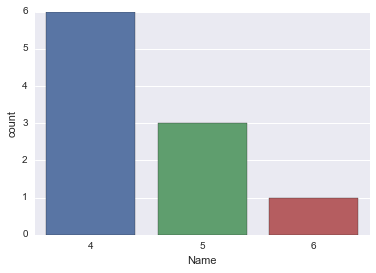

In [16]:
# CountPlot doesnt work well with value-count data
# If we use it, it will count the numbers for us
# and find the times 6s, 5s, and 4s occured
data = cars_df.Name.value_counts()[:10]
sns.countplot(data)

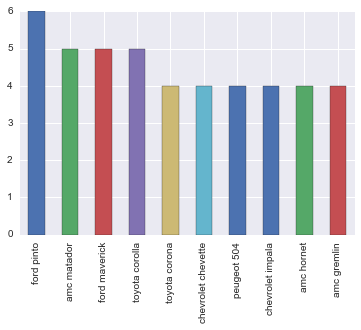

In [17]:
# Instead use simply bar plot from matplot lib
# after filtering topten from value_counts

cars_df.Name.value_counts()[:10].plot(kind="bar")

# What can you tell from this plot?

# Distribution Plot
- Useful to look at the distribution of values for a continuous or numeric variable
- Named a distribution plot to distinguish it from the matplot lib histogram, but they are the same
- Which variables can we plot using it?

In [18]:
weather_df.head()

location              date  precipitation  temp_max  temp_min  wind  weather
0  Seattle  2012-01-01 00:00            0.0      12.8       5.0   4.7  drizzle
1  Seattle  2012-01-02 00:00           10.9      10.6       2.8   4.5     rain
2  Seattle  2012-01-03 00:00            0.8      11.7       7.2   2.3     rain
3  Seattle  2012-01-04 00:00           20.3      12.2       5.6   4.7     rain
4  Seattle  2012-01-05 00:00            1.3       8.9       2.8   6.1     rain

In [19]:
cars_df.head()

Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
0          12.0          8         307.0       130.0              18.0   
1          11.5          8         350.0       165.0              15.0   
2          11.0          8         318.0       150.0              18.0   
3          12.0          8         304.0       150.0              16.0   
4          10.5          8         302.0       140.0              17.0   

                        Name Origin  Weight_in_lbs        Year  
0  chevrolet chevelle malibu    USA           3504  1970-01-01  
1          buick skylark 320    USA           3693  1970-01-01  
2         plymouth satellite    USA           3436  1970-01-01  
3              amc rebel sst    USA           3433  1970-01-01  
4                ford torino    USA           3449  1970-01-01

# Distribution Plot
- weather_df: precipitation, temp_max, temp_min, wind
- cars_df: Acceleration, Displacement, Horsepower, Miles_per_Gallon, Weight_in_lbs
    - Why isn't Cylinders included here?

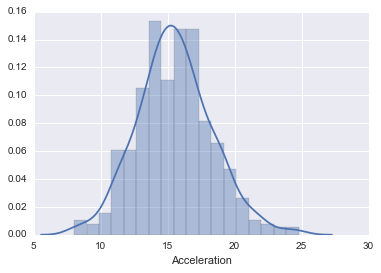

In [20]:
sns.distplot(cars_df.Acceleration)

# Add the argument kde=False to remove the distribution line
# you can set the range of values in each bar
# using bins argument

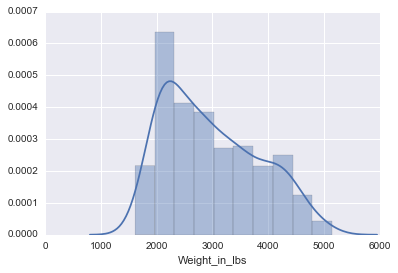

In [22]:
# Here is the distribution of another variable
sns.distplot(cars_df.Weight_in_lbs)

In [47]:
# try to plot cars_df.Horsepower
# What is the problem?
# how can we fix it? (2 solutions available)

# Pie Chart
- Used to represent proportinos of **categorical** variables
- Available in Matplotlin

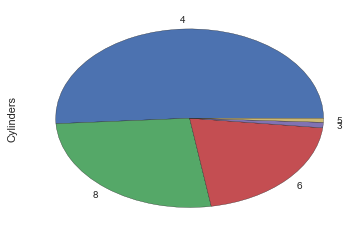

In [51]:
cars_df.Cylinders.value_counts().plot(kind="pie")

([<matplotlib.patches.Wedge at 0x119c8bb38>,
  <matplotlib.text.Text at 0x119c9e518>])

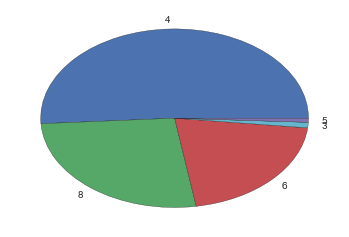

In [66]:
# another way of doing it with matplot lib
import matplotlib.pyplot as plt
plt.pie(cars_df.Cylinders.value_counts(), labels=cars_df.Cylinders.value_counts().index)

# BoxPlot
- One of the original plots for EDA
- Used with continuous variables
- Gives an idea about distribution/skewness of data
- Inter-Quartile Range (IQR in the both (1st to 3rd quartiles)
- Shows possible outliers (above/below 1.5*IQR)
- Shows outliers (above/below 3*IQR)
- Used best to compare distributions of variables or subgroups

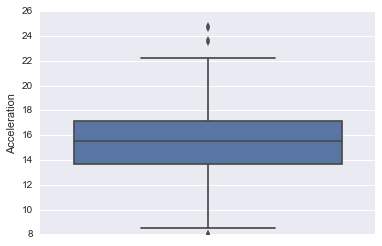

In [77]:
# orient can be 'v' or 'h
sns.boxplot(cars_df.Acceleration, orient='v')

# Your Turn
Explore the [seaborn documentation](https://seaborn.pydata.org/api.html) and try to plot the categorical variables using:
- Violin Plot
- Swarm Plot
- Strip Plot

In [78]:
# Your work here
# You can add cells as needed

# Time Series
- Time series is data that changes over time
- When plotting such data, the value is placed in the Y axis with the time value on the X axis
- Time can be period, day, date, week, month, year ..etc
- Time values will be ordered

# Plotting Time Series
- Typically, line plots or scatter plots can be used
- Possible to use other plots if they make sense and can show the message you are trying to convey
    - Experiment to see what you can do
- You can use seaborn tsplot, but it will be removed in the future
- Use matplotlib plot_date


In [5]:
# But first, remember to convert the date field to datetime object
weather_df.date = pd.to_datetime(weather_df.date)

In [9]:
weather_df.columns

Index(['location', 'date', 'precipitation', 'temp_max', 'temp_min', 'wind',
       'weather'],
      dtype='object')

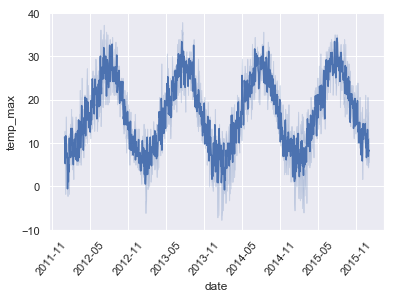

In [17]:
import matplotlib.pyplot as plt
# to rotate the date by 50 degrees
plt.xticks(rotation=50)

#plt.plot_date(x=weather_df.date, y=weather_df.temp_max, fmt='g-')
sns.lineplot(x="date", y="temp_max",
             data=weather_df)

# Multivariate Visualization
- Used to compare univariate distributions between groups
- Used to find relations between 2 variables
- Used to see how a relationship changes between 2 variables across groups

# Plots
- Best at representing two variables on the X and Y axes
- Three variables possible with 3D plots but should be avoided if possible.
- Third variable usually represented as color, shape, or another plot
    - Most suitable for comparison of relationship or distributions across groups

In [1]:
# Setup the libraries
%matplotlib inline 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sns.set(color_codes=True)


# lets load the data again
weather_df = pd.read_csv("https://raw.githubusercontent.com/vega/vega-datasets/master/data/weather.csv")
cars_df = pd.read_json("https://github.com/vega/vega-datasets/raw/master/data/cars.json")

# Plotting Two Variables
- Both matplot and seaborn could be used
- Scatter plot typically used
- Can help detect relations
    - Time searies plots are a special form of these plots showing relationship to time
    - line plots possible with time series

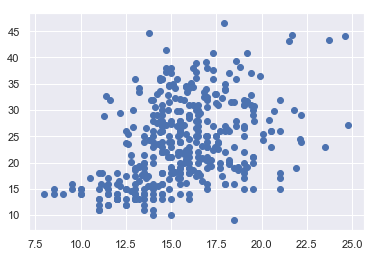

In [23]:
# Scatter plot for Acceleration X Miles per gallon
plt.scatter(cars_df.Acceleration, cars_df.Miles_per_Gallon)

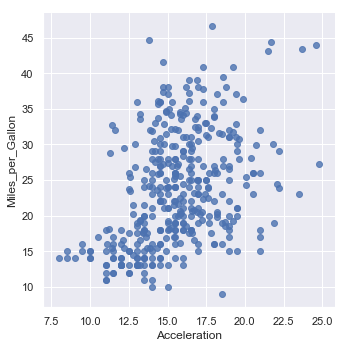

In [24]:
# Scatter plot with Seaborn
sns.lmplot(x='Acceleration', y='Miles_per_Gallon', data=cars_df, fit_reg=False)

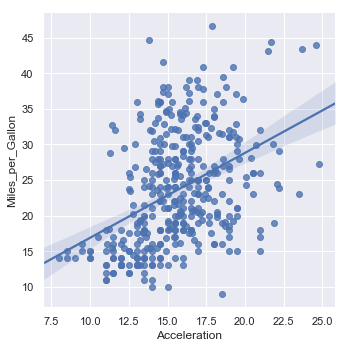

In [27]:
# Seaborn can also fit a regression line to show the direction of the relation
sns.lmplot(x='Acceleration', y='Miles_per_Gallon', data=cars_df)

# Plotting Three or More Variables
- This typically means we are comparing subgroups in our data
- You can use colors (hue) to represent different groups
- You can also plot different groups in different plot side by side
    - Organized in rows, or columns
- The groups are typically categorical variables
    - Consider Subdividing continuous variables if you want to use as groups

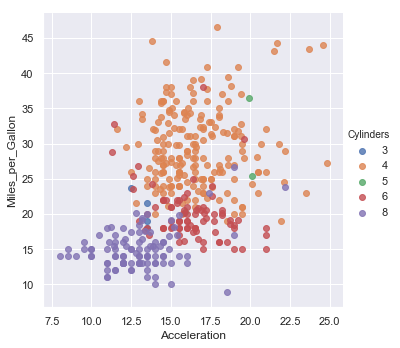

In [28]:
# Plotting 3 variables, using Hue
sns.lmplot(x='Acceleration', y='Miles_per_Gallon', hue='Cylinders',data=cars_df, fit_reg=False)

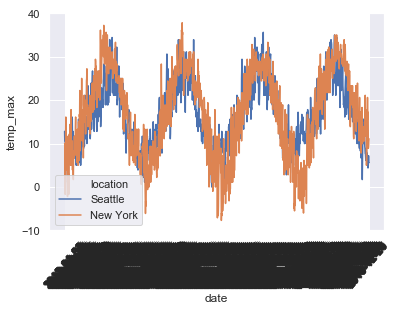

In [3]:
# The same could be done with the timeseries line plots
# to show Seattle alongside New York
plt.xticks(rotation=50)
sns.lineplot(x="date", y="temp_max",
             hue="location",
             data=weather_df)

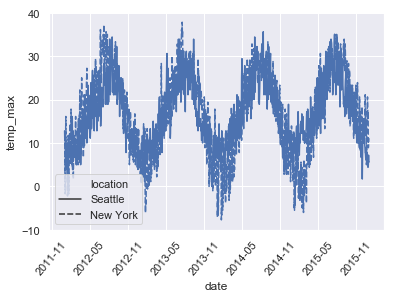

In [18]:
# Here is a different way of doing it based on line style
plt.xticks(rotation=50)
sns.lineplot(x="date", y="temp_max",
             style="location",
             data=weather_df)

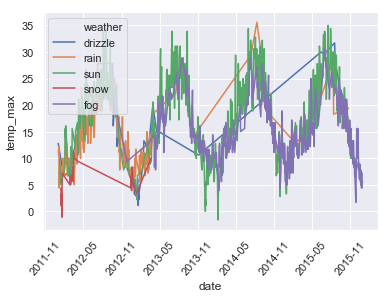

In [21]:
# Can you explain what we are trying to do here?
plt.xticks(rotation=50)
sns.lineplot(x="date", y="temp_max",
             hue="weather",
             data=weather_df[weather_df.location == "Seattle"])

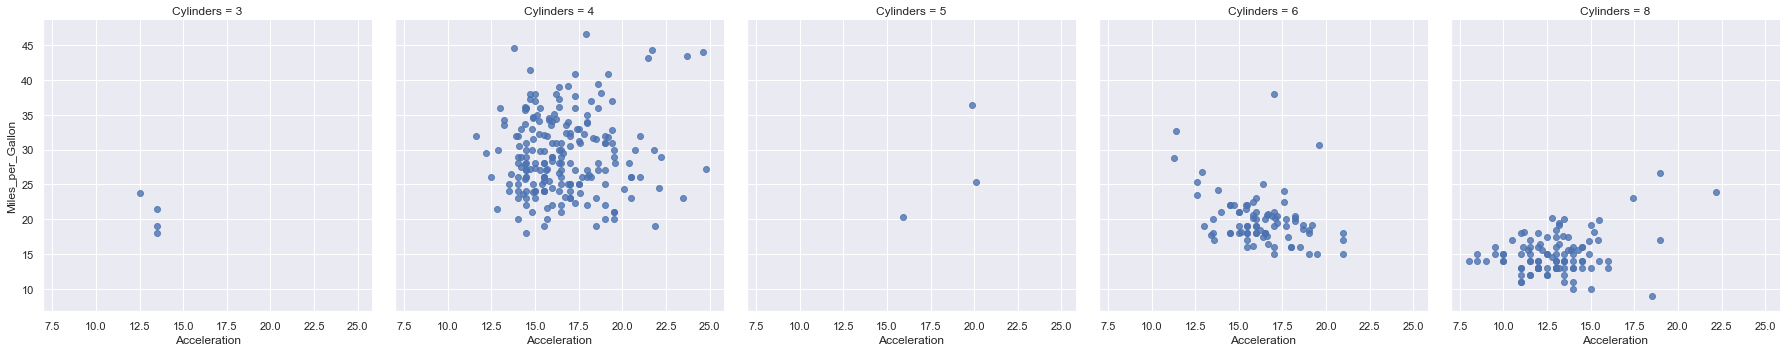

In [2]:
# Some plots allow the use of row and col
# See what happens when I replace hue with col for the 
# accelation vs miles_per_galon lmplot
sns.lmplot(x='Acceleration', y='Miles_per_Gallon', col='Cylinders',data=cars_df, fit_reg=False)

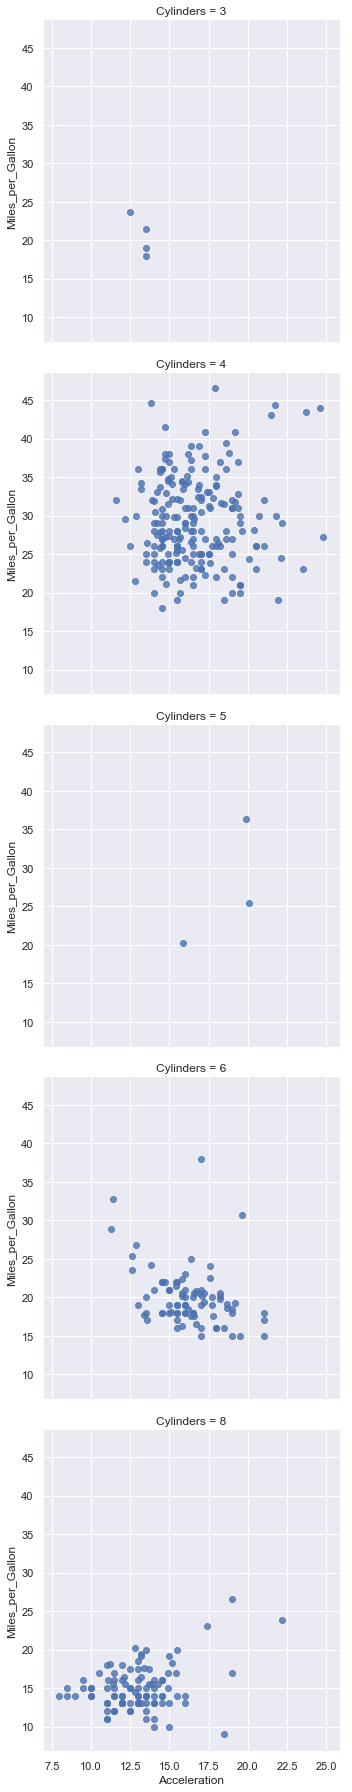

In [4]:
# now row
sns.lmplot(x='Acceleration', y='Miles_per_Gallon', row='Cylinders',data=cars_df, fit_reg=False)

# Using row/col In Seaborn Plots
- Avoid using it with variables that have many values
    - Will create many plots
    - Difficult to compare
- Use when variable has few values

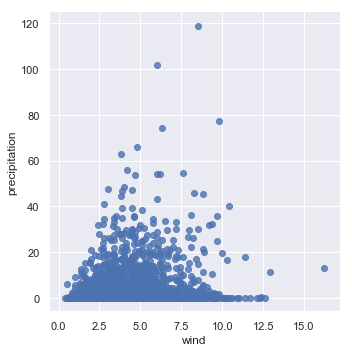

In [5]:
# Let's examine relationship between wind and percipitation in weather_df
g = sns.lmplot(x='wind', y='precipitation', data=weather_df, fit_reg=False)

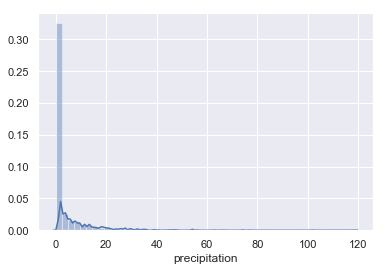

In [10]:
# Distribution of percipitation
sns.distplot(weather_df.precipitation)

# The values are bunched up close to zero

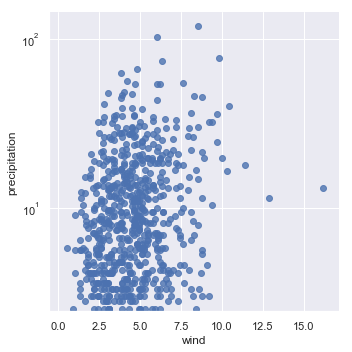

In [7]:
# Using log scale on the y access will make the plot clearer
g = sns.lmplot(x='wind', y='precipitation', data=weather_df, fit_reg=False)
g.set(yscale="log")

# No clear relationship

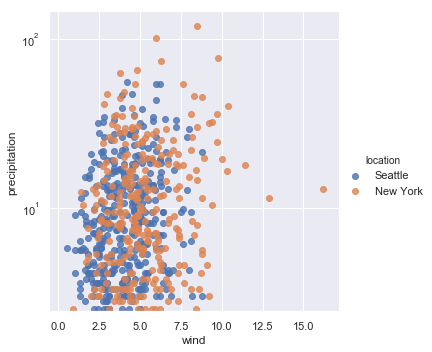

In [8]:
# Let's see if it is the same in all locations
g = sns.lmplot(x='wind', y='precipitation', hue='location', data=weather_df, fit_reg=False)
g.set(yscale="log")

# Hue not making comparison easy

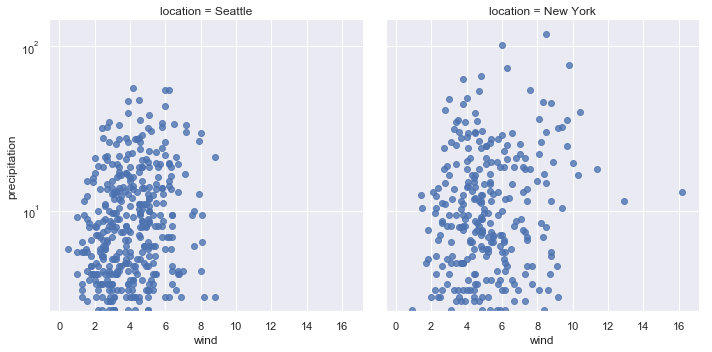

In [11]:
# two plots are better for comparison
g = sns.lmplot(x='wind', y='precipitation', col='location', data=weather_df, fit_reg=False)
g.set(yscale="log")

# Still no clear relation

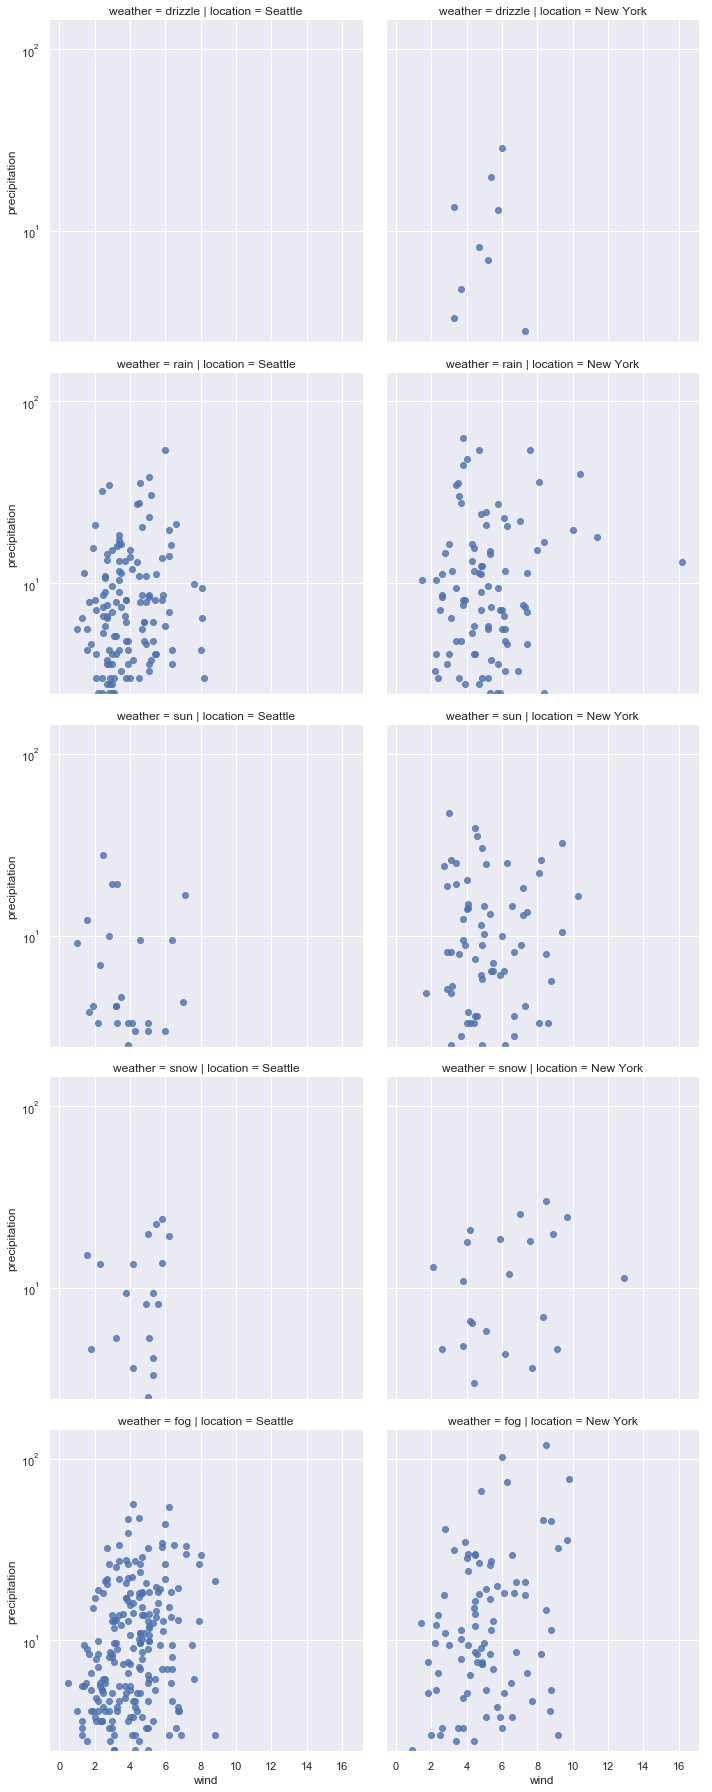

In [12]:
# Let's also break it based on weather types
g = sns.lmplot(x='wind', y='precipitation', col='location', row='weather', data=weather_df, fit_reg=False)
g.set(yscale="log")

# EDA
- Remember it is an investigation
- Sometimes our investigation takes as to a dead end
- We think of different ways to break our data
- Possibly rescale our axes, like the log scale
- Think about missing data that we might get
- There might be nothing interesting in the relationship
    - Examine other relationships

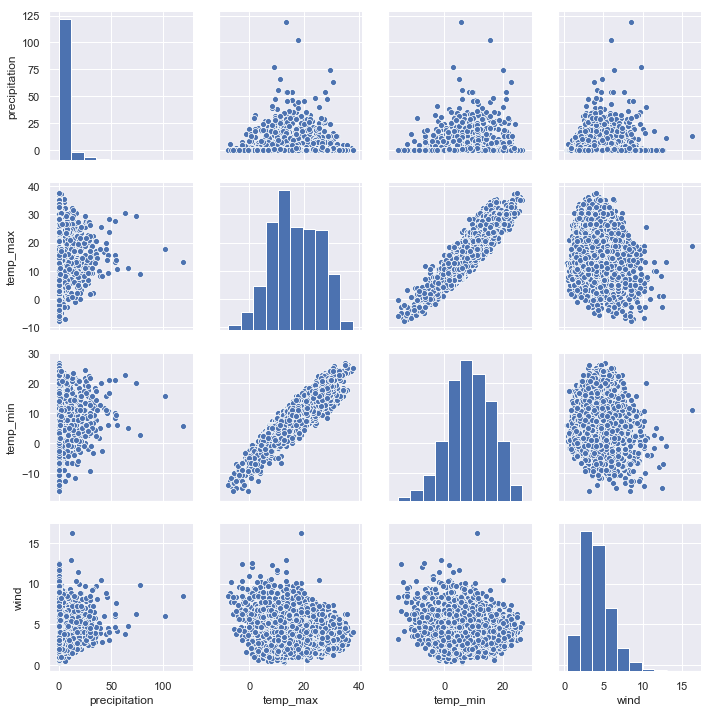

In [13]:
sns.pairplot(weather_df)

# Remember The Univariate Plots in Seaborn?
- Violin, stip, swarm, count, and dist plots
- You can use them for multivariate comparison of distributions
    - You can set both the y and hue to partition your data
- Cannot place them in rows and columns
    - Use them with factor plots

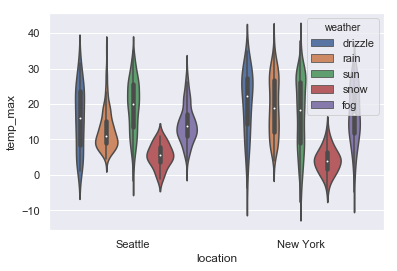

In [20]:
sns.violinplot(y="temp_max", x="location", hue="weather",data=weather_df)

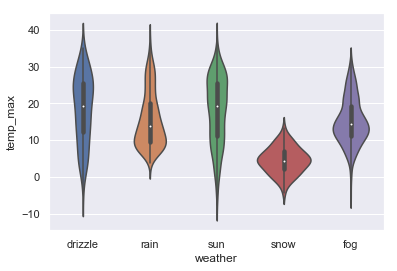

In [25]:
# trying to place them on top of each other (doesnt work)
sns.violinplot(y="temp_max", row="location", x="weather",data=weather_df)

# Categorical (Cat) Plots
- Use it to further breakdown the distributional plots
- Allows you to place them in rows and columns as well
- Examine [documentation for factor plot](https://seaborn.pydata.org/generated/seaborn.factorplot.html#seaborn.factorplot) and attempt to plot 2 different distributional plots in rows or columns for comparison

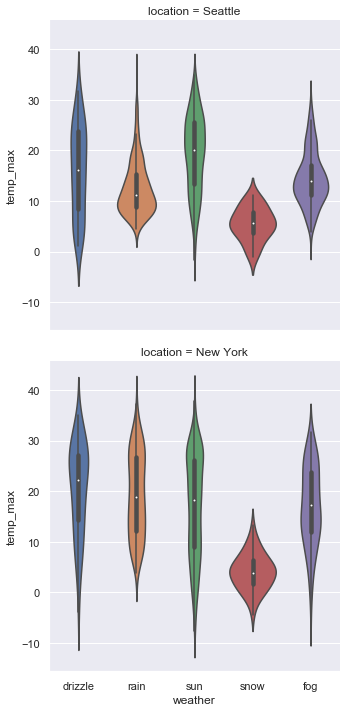

In [30]:
# Place two boxplots of max_temp side by side for seattle and new yorke broken by weather type
# replace violin with the kind of categorical plot you want instead
sns.catplot(y="temp_max", row="location", x="weather", kind="violin", data=weather_df)

In [ ]:
# Your turn to try different categorical plots
# try weather_df and cars_df

# What Next in Seaborn?
- Be sure to look at the [seaborn api](https://seaborn.pydata.org/api.html) to see the available plots
- The [gallery](https://seaborn.pydata.org/examples/index.html) will have some advanced examples that you can follow
- The [tutorial](https://seaborn.pydata.org/tutorial.html) is also another good starting point
- Try to visualize your own dataset!

# Reminder of recommended resources
- [Python resources](http://bit.ly/pyc_main), textbook chapters and links to useful resources compiled by Dr. AlMarzouq
- [The hitchhiker's guide to python](http://docs.python-guide.org/en/latest/), excellent resource to know how to perform certain tasks in python
- [Awsome python list](https://github.com/vinta/awesome-python), list of resources on how to perform certain tasks in python.
- [Python for Data Science List](https://github.com/ujjwalkarn/DataSciencePython), list of resources in python focusing on topics in data science.
- [List of interesting jupyter notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks), see how others have solved data analysis problems and shared their code.
- [Social network analysis list](https://github.com/briatte/awesome-network-analysis), list of useful resources on social network analysis.